## Comprehensive Guide on Feature Selection

- https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

### 1. Introduction to Feature Selection

feature selection은 ML 모델을 학습하기 위해 전체 피처에서 피처 서브셋을 선택하는 과정이다.


#### Advantages of selecting features
- 정확도 개선
- 모델이 심플해져서 해석이 용의
- 학습시간 단축
- 오버피팅을 완화해서 일반화 성능 향상
- 소프트웨어 구현이 용이
- 배포중 모델 에러 위험 저감

#### Feature selection 기법
- Filter methods
  - Basic methods
  - Univariate methods
  - Information gain
  - Fischer score
  - Correlation Matrix with Heatmap
- Wrapper methods
  - Forward Selection
  - Backward Elimination
  - Exhaustive Feature Selection
  - Recursive Feature Elimination
  - Recursive Feature Elimination with Cross-Validation
- Embedded methods
  - LASSO
  - RIDGE
  - Tree Importance

### 2.Filter methods
필터 방법은 전처리 단계로 사용되며, ML 방법과 무관함.  
피처를 선태할 때 변수들의 상관도를 통계 기법으로 테스트해서 선택한다.   
이 방법의 특징은 다음과 같음
- 데이터, 즉 피처의 특성에 의존적이다.
- ML 모델을 사용하지 않는다.  
- 계산 비용이 적다.
- ML 모델 종류에 구애받지 않는다.(Model agnostic)
- 일반적으로 wrapper 방식보다 예측 성능이 낮다.  
- 관련없는 피처를 빠르게 제거하고 싶을 때 적합하다.

필터 방법의 종류는 다음과 같다.  
- 2.1. Basic methods
- 2.2. Univariate feature selection
- 2.3. Information gain
- 2.4. Fischer score
- 2.5. ANOVA F-Value for Feature Selection
- 2.6. Correlation Matrix with Heatmap

필터방식 적용절차를 표현하면 다음과 같다.  
set of all features -> selecting the best subset -> learning algorithm -> performance

#### 2.1 Basic methods   
- 상수, 준 상수 피처를 제거한다.

상수피처 제거하기 
- 여기서는 sklearn의 VarianceThreshold function을 사용함
- https://scikit-learn.org/stable/modules/feature_selection.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [2]:
os.listdir('data')

['mushrooms', 'house-price', 'CMaps', 'santander', 'house', 'vehicles.csv']

In [3]:
os.walk('data')

<generator object _walk at 0x16a883c80>

In [4]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/vehicles.csv
data/mushrooms/mushrooms.csv
data/house-price/test.csv
data/house-price/data_description.txt
data/house-price/train.csv
data/house-price/sample_submission.csv
data/CMaps/Damage Propagation Modeling.pdf
data/CMaps/train_FD001.txt
data/CMaps/train_FD003.txt
data/CMaps/RUL_FD004.txt
data/CMaps/train_FD002.txt
data/CMaps/RUL_FD001.txt
data/CMaps/x.txt
data/CMaps/RUL_FD003.txt
data/CMaps/RUL_FD002.txt
data/CMaps/train_FD004.txt
data/CMaps/test_FD003.txt
data/CMaps/test_FD002.txt
data/CMaps/test_FD001.txt
data/CMaps/test_FD004.txt
data/CMaps/readme.txt
data/santander/test.csv
data/santander/train.csv
data/santander/sample_submission.csv
data/house/train.csv


산탄데르 데이터셋 사용

In [5]:
X_train = pd.read_csv('data/santander/train.csv', nrows = 35000)
X_test = pd.read_csv('data/santander/test.csv', nrows=15000)

In [6]:
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [7]:
X_train = X_train.drop(labels=['TARGET'], axis = 1)

In [8]:
X_train.shape, X_test.shape

((35000, 370), (15000, 370))

중요 : feature selection을 진행할 때 학습 데이터만 사용한다. 과적합 방지

variance threshold from sklearn
- Variance threshold는 간단한 베이스라인이 될 수 있다.  
- 이 방법은 Variance 가 특정 기준을 만족하지 못하면 피처를 제거하는 방식이다.
- 디펄트로 zero-variance 피처를 제거한다.(즉 모든 샘플에서 같은 값을 가지는 피처)

In [9]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [10]:
# get support 를 사용하면 유지해야할 피처수를 리턴한다.
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
sum(sel.get_support())

319

In [12]:
len(X_train.columns[sel.get_support()])

319

In [13]:
# 상수 컬럼 확인
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ])
)

51


In [14]:
[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

['ind_var2_0',
 'ind_var2',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var2

transform을 사용하면 해당 피처를 제거한다.

In [15]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 319), (15000, 319))

준 상수 피처(quasi-constant feature) 제거

- 준상수 피처는 측정 값의 대부분이 동일한 값을 나타내는 피처이다.   
- 일반적으로 ML모델을 학습하는데 정보를 거의 제공하지 않는다. 하지만 예외도 있으므로 제거할 때 유의해야한다.  
- sklearn의 VarianceThreshold를 조정하여 사용가능하다.

In [16]:
X_train = pd.read_csv('data/santander/train.csv', nrows = 35000)
X_test = pd.read_csv('data/santander/test.csv', nrows=15000)

X_train = X_train.drop(labels=['TARGET'], axis = 1)

X_train.shape, X_test.shape

((35000, 370), (15000, 370))

variance 임계 값을 설정하여 요구조건을 충족하지 않는 것을 제거한다.

In [17]:
sel = VarianceThreshold(threshold=0.01)  # 데이터의 99% 이상이 일정하면 제거

sel.fit(X_train) 

VarianceThreshold(threshold=0.01)

In [18]:
sum(sel.get_support())

263

In [19]:
len(X_train.columns[sel.get_support()])

263

In [20]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

107


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_

- 107개의 컬럼이 상수에 가깝다.  
- 즉 샘플의 99% 이상이 같은 값인 컬럼이 107개이다.

In [21]:
# 컬럼 예시
X_train['ind_var31'].value_counts() / len(X_train)

ind_var31
0    0.996286
1    0.003714
Name: count, dtype: float64

In [22]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 263), (15000, 263))

- 상수, 준상수 피처를 제거기법을 통해서 100개 이상의 피처를 줄일수 있다
- 370 -> 263

#### 2.2 Univariate selection methods

- ANOVA와 같은 단변량 통계 테스트를 기반으로 최상의 피처를 선택하는 방법이다.  
- 이 방법도 전처리 방법의 일환이다.  
- F-test에 기반한 방법은 두 변수간의 선형 의존성의 정도를 추정한다. 이 방법은 더 피처와 타겟 간의 선형 관계가 있다고 가정한다. 그리고 피처들이 가우시안을 따른다고 가정한다.

대표적인 방법은 다음과 같다.  
- SelectKBest
- SelectPercentile
- SelectFpr, SelectFdr, or family wise error SelectFwe
- GenericUnivariateSelection

- https://scikit-learn.org/stable/modules/feature_selection.html

SelectKBest  
k highest scores에 기반하여 피처를 선택하는 방법이다.  
예를 들어 chi-squre(카이제곱) 테스트를 수행해서 아이리스 데이터의 가장 우사한 피처 두개를 찾아낼 수 있다.
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [23]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [24]:

X_new = SelectKBest(score_func=chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

SelectPercentile  
highest scores의 퍼센타일에 따라 스코어 선택???
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html#sklearn.feature_selection.SelectPercentile

In [25]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2

X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [26]:
# top 10 percentile 피처를 선택

X_new = SelectPercentile(score_func=chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

- SelectKBest, SelectPercentile 객체는 univariate score나 P-value를 리턴하는 score function을 입력으로 받는다.
- 회귀 문제에서는 :  f_regression, mutual_info_regression
- 분류 문제에서는 : chi2, f_classif, mutual_info_classif

위에서,
- F-test에 기반한 방법은 두 랜덤변수간의 선형 의존성의 정도를 추정한다.   
- 반면 mutual information 방법은 모든 종류의 통계적 의존성을 포착한다. nonparametic이어서 정확한 추정을 위해 많은 샘플이 필요하다.

Feature selection with sparse data  
- sparse data를 다룬다면, chi2, mutual_info_regression, mutual_info_classif 를 추천한다..??  
- https://scikit-learn.org/stable/modules/feature_selection.html

#### Information Gain

- Information gain 또는 mutual information은 피처의 유무가 얼마나 정확한 예측에 기여하는지 측정한다.  
- mutual information은 X, Y가 공유하는 정보를 측정한다. 
  - 즉, 두 변수 중 하나를 알면 다른 변수에 대한 불확실성이 얼마나 줄어드는지를 측정합니다.  
  - 예를 들어 X와 Y가 독립적인 경우 X를 안다고 해서 Y에 대한 정보를 얻을 수 없으며, 그 반대의 경우도 마찬가지이므로 상호 정보는 0입니다.  
  - 반대로 X가 Y의 결정 함수이고 Y가 X의 결정 함수인 경우 X가 전달하는 모든 정보는 Y와 공유되므로 X를 알면 Y의 값이 결정되고 그 반대의 경우도 마찬가지입니다. 결과적으로 이 경우 상호 정보는 Y(또는 X)에만 포함된 불확실성, 즉 Y(또는 X)의 엔트로피와 동일합니다. 또한 이 상호 정보는 X의 엔트로피와 Y의 엔트로피와 동일합니다. (매우 특별한 경우는 X와 Y가 동일한 무작위 변수인 경우입니다.)

mutual_info_classif
- 분류용 타겟 변수에 대한 상호 정보를 측정
- 두 랜덤 변수간의 mutual info는 음수가 아닌 값이며, 두 변수간 의존성을 측정함. 갚이 클수록 의존성이 높음
- 이 함수는 KNN distance의 엔트로피 추정에 기반한 nonparametic 방법을 사용한다.
- 단변량 피처 선택에 사용할 수 있다. 

mutual_info_regression
- 회귀용 타겟 변수에 대한 상호 정보를 측정
- 두 랜덤 변수간의 mutual info는 음수가 아닌 값이며, 두 변수간 의존성을 측정함. 갚이 클수록 의존성이 높음
- 이 함수는 KNN distance의 엔트로피 추정에 기반한 nonparametic 방법을 사용한다.
- 단변량 피처 선택에 사용할 수 있다. 

#### 2.4 Fisher Score (chi-square implementation) 

- 사이킷런에서 chi-squre를 구현한 것임. 음수가 아닌 각 특징과 클래스 간의 카이제곱 통계를 계산함.
- 이 score는 분류 문제에서 카테고리 변수를 평가하는데 사용해야한다. 
- 이 score는 피처의 여러 카테고리 중에서 타겟 Y의 여러 클래스에서 관찰된 분포를 피처 카테고리와 관계없이 예측된 타겟 분포와 비교한다.

In [27]:
# load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2


In [28]:
iris = load_iris()
X = iris.data
y = iris.target

X = X.astype(int) # 정수형으로 만들어서  카테고리 타입으로 만듬

In [29]:
chi2_selector = SelectKBest(chi2, k = 2)
X_kbest = chi2_selector.fit_transform(X, y)

In [30]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


#### 2.5 ANOVA F-value for feature selection

- 샘플에 대한 분산분석(ANOVA) F 값을 계산한다.
- 범주형 데이터는 피처와 타겟간 카이제곱  값을 계산한다.
- 실수형 데이터는 피처와 타겟간 ANOVA F값을 계산한다.
- F 값은 피처를 타겟 벡터로 그룹화 했을 떄, 각 그룹의 평균이 유의미하게 다른지 검사한다.

In [31]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [32]:
# Load iris data
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [33]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


- We can see that the above code helps us to select the 2 best features based on ANOVA F-Value.

#### 2.6 Heatmap을 사용한 corr matrix

- 좋은 피처는 타겟과 상관성이 높다.
- 상관성이 높은 예측 인자 피처는 중복 정보를 제공한다.
- 피처는 타겟과 상관성이 높고, 피처간 상관성은 낮아야 한다.

- 상관도 기반 feature selection은 다음 가설을 기반으로 피처 서브셋을 평가한다.
    - 좋은 피처 서브셋은 타겟과 높은 상관성을 보이고, 서로간 상관성이 낮은 것이다.

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [35]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [36]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


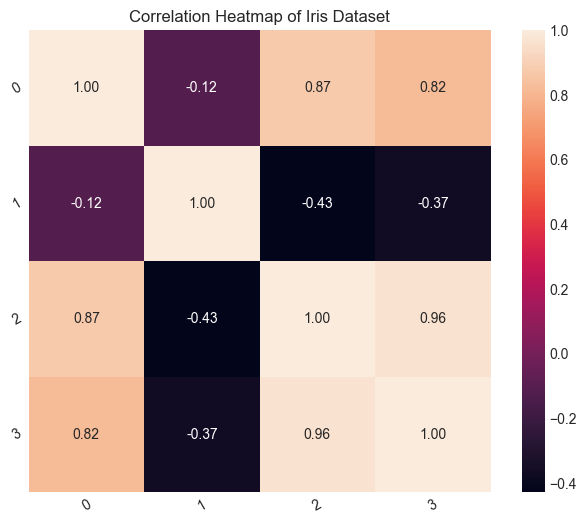

In [37]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [38]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [39]:
upper

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [40]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[3]


In [41]:
# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)

In [42]:
print(df1)

       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]


### 3. Wrapper Methods  
이 방법은 피처의 하위 집합을 사용해서 모델을 학습한다. 그리고 이전 모델에서 예측한 결과를 바탕으로 피처 추가, 제거 여부를 결정한다.   
일종에 검색문제로 볼수가 있으며, 계산량이 많은 편이다.   

다음과 같은 종류의 방법이 있다.

- Forward selection,
- Backward elimination,
- Exhaustive feature selection,
- Recursive feature elimination.
- Recursive feature elimination with cross-validation

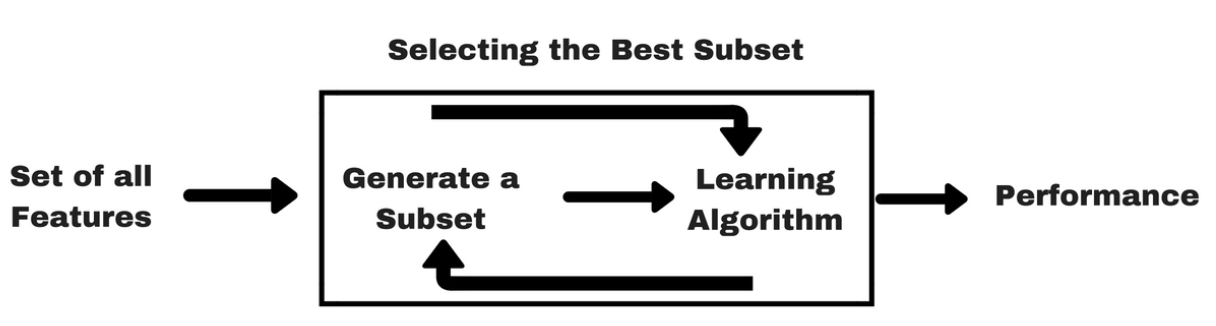

#### 3.1 Forward selection

- 피처가 없는 상태에서 시작하는 반복적인 방법이다. 매 반복 시점에 새 피처를 추가해도 모델 성능이 개선되지 않을 때까지 피처를 추가한다.   
- 처음에는 reduced set이라는 빈 집합에서 시작한다. 이 상태에서 원본 피처 중에서 가장 좋은 피처가 결정되어 reduced set에 추가된다. 이 후 나머지 속송 중에서 가장 좋은 것이 집합에서 추가된다.  
- 단계별 특징 선택은 모든 특징을 개별적으로 평가하는 것으로 시작하여 미리 설정된 평가 기준에 따라 가장 성능이 좋은 알고리즘을 생성하는 특징을 선택합니다. 두 번째 단계에서는 선택한 특징과 두 번째 특징의 가능한 모든 조합을 평가하고 동일한 사전 설정 기준에 따라 가장 우수한 성능의 알고리즘을 생성하는 쌍을 선택합니다.???  
- 사전 설정된 기준(criteria)는 분류에서 roc_auc, 회귀에서 R2가 될 수있다.  
- 이 방법은 가능한 모든 single, double, triple 등과 같은 모든 조합을 평가하기 때문에 greedy라고 한다. 따라서 계산량이 많고, 피처 공간이 크면 실행이 불가능할 수도 있다.  
- mlxtend를 사용하면 이 기법을 적용할 수 있다.   
- mlxtend에서 중지 기준(stop criteria)는 사용자가 설정한 피처의 수이다. 따라서 원하는 수의 피처에 도달하면 검색이 완료된다.
- 여기서는 집값 가격 예측에 적용해본다.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [44]:
data = pd.read_csv("data/house-price/train.csv")
data.shape

(1460, 81)

In [45]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [47]:
# 상관성이 높은 컬럼 제거하는 함수 구현

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] # 컬럼명 추출
                col_corr.add(colname)
                
    return col_corr

In [48]:
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [49]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1022, 34), (438, 34))

In [50]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
GarageCars         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [51]:
X_train = X_train.fillna(0)

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    5.2s finished

[2023-07-03 09:01:13] Features: 1/10 -- score: 0.6689830792748689[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    5.5s finished

[2023-07-03 09:01:19] Features: 2/10 -- score: 0.7230596967264086[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    5.8s finished

[2023-07-03 09:01:25] Features: 3/10 -- score: 0.7457582261670833[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [53]:
sfs1.k_feature_idx_


(4, 5, 6, 9, 13, 14, 17, 19, 24, 26)

In [54]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'GarageCars', 'OpenPorchSF'],
      dtype='object')

#### 3.2 Backward Elimination

- 진행하면서 가장 덜 중요한 피처를 제거해나가는 방식 
- 성능 향상이 없을 때까지 반복합   
- 프로세스는 전체 속성 세트부터 시작한다.

In [55]:
sfs1 = SFS(
    RandomForestRegressor(),
    k_features=10,
    forward = False,
    floating=False,
    verbose = 2,
    scoring='r2',
    cv=3
)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   36.7s finished

[2023-07-03 09:07:21] Features: 33/10 -- score: 0.8598097059664814[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   33.9s finished

[2023-07-03 09:07:55] Features: 32/10 -- score: 0.8578359106744209[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   31.3s finished

[2023-07-03 09:08:27] Features: 31/10 -- score: 0.8602261691934898[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [56]:
sfs1.k_feature_idx_

(4, 5, 6, 7, 8, 9, 12, 16, 24, 32)

In [57]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'MoSold'],
      dtype='object')

#### 3.3 Exhaustive Feature Selection

- 특정 머신 러닝 알고리즘에 대해 지정된 성능 메트릭을 최적화하여 가능한 모든 특징 하위 집합 중에서 가장 좋은 특징 하위 집합을 선택합니다. 예를 들어 분류기가 로지스틱 회귀이고 데이터 세트가 4개의 특징으로 구성된 경우, 알고리즘은 다음과 같이 15개의 모든 특징 조합을 평가합니다:
  - all possible combinations of 1 feature
  - all possible combinations of 2 features
  - all possible combinations of 3 features
  - all the 4 features

- 모든 조합을 평가하므로 greedy 알고리즘이다.  
- 계산량이 많으므로 피처 수가 많으면 적용이 어렵다.  
- 이때 mlextend를 사용하면 좋다.임으로 설정된 피처수가 되면 검색을 완료 시킬수 있다.

#### 3.4 Recursive Feature elimination

최고 성능의 기능 하위 집합을 찾는 것을 목표로 하는 욕심 많은 최적화 알고리즘입니다. 반복적으로 모델을 생성하고 각 반복마다 최고 또는 최하 성능의 특징을 따로 보관합니다. 모든 피처가 소진될 때까지 남은 피처로 다음 모델을 구축합니다. 그런 다음 제거 순서에 따라 특징의 순위를 매깁니다.

재귀적 특징 제거는 가장 성능이 좋은 특징 하위 집합을 찾기 위해 탐욕스러운 검색을 수행합니다. 반복적으로 모델을 생성하고 각 반복에서 가장 성능이 좋은 피처 또는 가장 성능이 나쁜 피처를 결정합니다. 모든 피처가 탐색될 때까지 왼쪽 피처로 후속 모델을 구성합니다. 그런 다음 제거 순서에 따라 피처의 순위를 매깁니다. 최악의 경우, 데이터 세트에 N개의 특징이 포함된 경우 RFE는 2N개의 특징 조합에 대해 탐욕스러운 검색을 수행합니다.

- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py

#### 3.5 Recursive Feature Elimination with Cross-Validation

교차 검증을 통한 재귀적 특징 제거(RFECV) 특징 선택 기법은 재귀적 특징 제거를 사용하여 반복적으로 0~N개의 특징을 제거하여 추정기에 가장 적합한 특징 하위 집합을 선택합니다.

그런 다음 모델의 정확도 또는 교차 검증 점수 또는 ROC-AUC를 기준으로 최상의 하위 집합을 선택합니다. 재귀적 특징 제거 기법은 모델을 여러 번 피팅하고 각 단계마다 가장 약한 특징을 제거하여 모델에서 n개의 특징을 제거합니다.

- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

### 4. Embedded Methods

- 모델을 학습한후 예측에 기여하는 피처를 신중하게 추출하는 방법
- 정규화 방법을 주로 사용하는데 예측 알고리즘에 추가 제약을 도입하여 낮은 복잡을 가지도록 한다.  
- lass, lidge를 주로 사용한다.

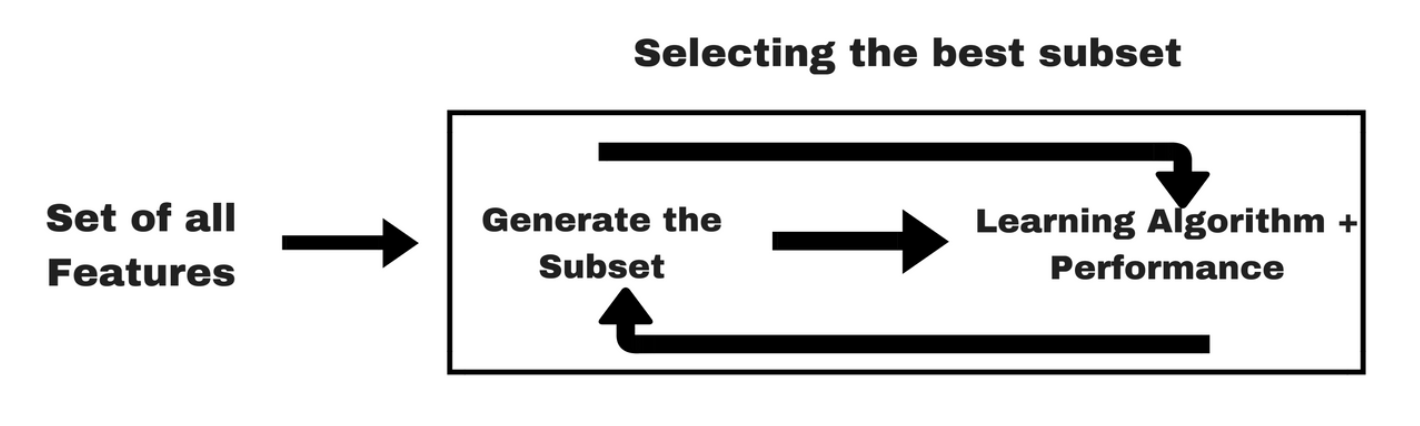

#### 4.1 Lasso regression

- 계수 크기의 절대 값에 해당하는 L1 정규화를 수행  
- 일부 계수를 0으로 축소함

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [59]:
data = pd.read_csv("data/house-price/train.csv")
data.shape

(1460, 81)

In [60]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [62]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))
scaler

StandardScaler()

In [63]:
sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [64]:
sel_.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [65]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 37
selected features: 33
features with coefficients shrank to zero: 4


올가미 정규화가 데이터 세트에서 중요하지 않은 특징을 제거하는 데 도움이 된다는 것을 알 수 있습니다. 따라서 페널티를 높이면 제거되는 특징의 수가 증가하게 됩니다. 따라서 페널티를 너무 높게 설정하여 중요한 특징까지 제거하거나, 너무 낮게 설정하여 중요하지 않은 특징을 제거하지 않도록 주의하고 모니터링해야 합니다.

페널티가 너무 높아 중요한 특징이 제거되면 알고리즘의 성능이 저하되고 정규화를 줄여야 한다는 사실을 깨닫게 됩니다.

#### 4.2 Random Forest Importance

### 5. How to choose the right feature selection method

#### Numerical Input, Numerical Output
- 회귀 문제
- 일반적으로 상관성 계수를 주로 활용함  
  - Pearson for linear correlation
  - rank-based method for nonlinear correlation

- 다음 방법을 사용
  - Pearson’s correlation coefficient (linear)
  - Spearman’s rank coefficient (nonlinear)

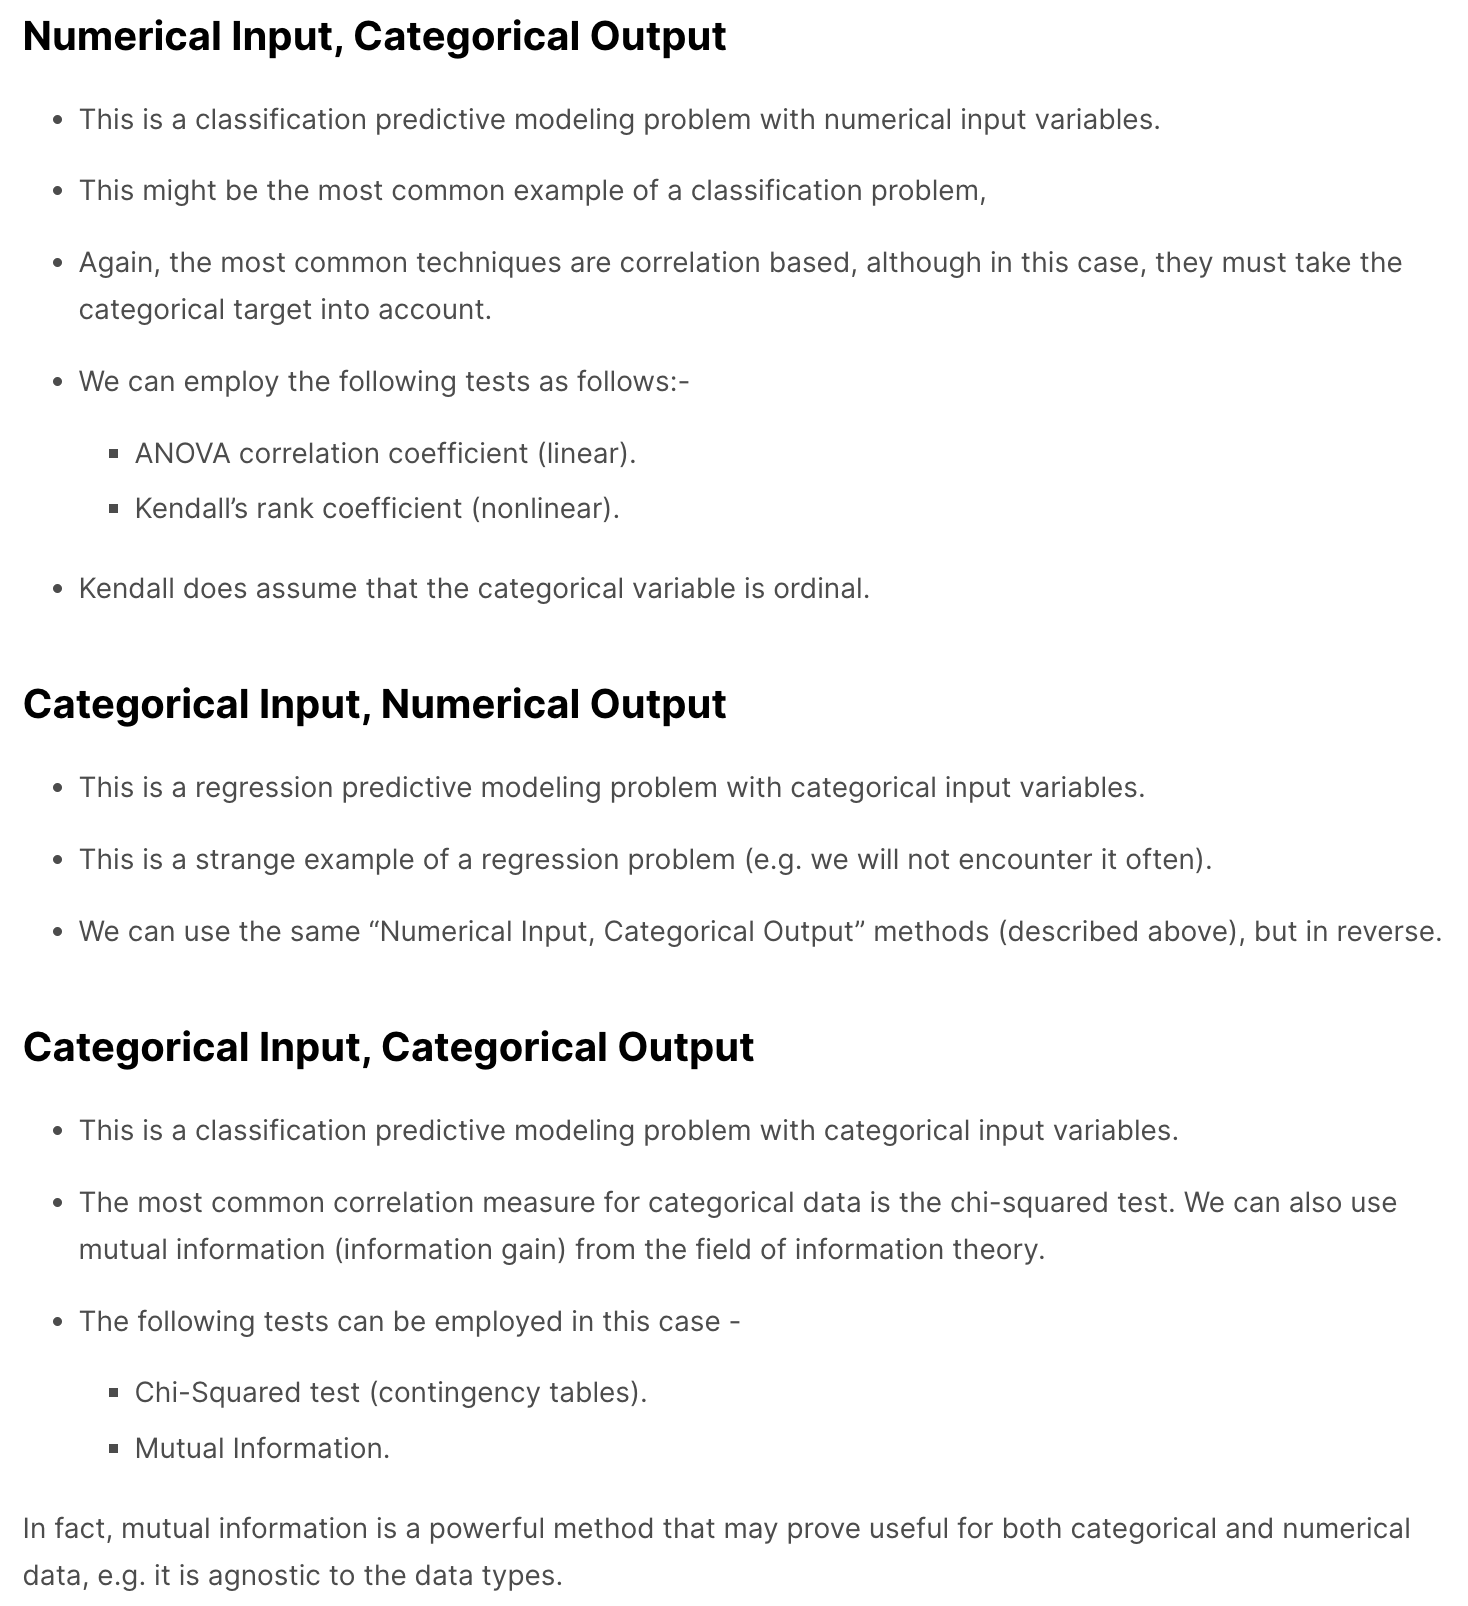

### 6. Tips and Tricks for Feature Selection

#### Correlation statistics
- 사이킷런에서 라이브러리를 제공함
- Pearson’s Correlation Coefficient: f_regression()
- ANOVA: f_classif()
- Chi-Squared: chi2()
- Mutual Information: mutual_info_classif() and mutual_info_regression().


#### Selection Method
- Select the top k variables: SelectKBest
- Select the top percentile variables: SelectPercentile

#### What Is the Best Method?
- There is no best feature selection method. Just like there is no best set of input variables or best machine learning algorithm.

- Instead, we must discover what works best for your specific problem using careful systematic experimentation.

- We should try a range of different models fit on different subsets of features chosen via different statistical measures and discover what works best for your specific problem.

#### 4 best ways of Feature Selection¶
- The 4 practical ways of feature selection which yield best results are as follows:-

    - SelectKBest
    - Recursive Feature Elimination
    - Correlation-matrix with heatmap
    - Random-Forest Importance